# Evaluation

In [44]:
import pandas as pd
import pickle
from utils import preprocessing, plotting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score, precision_recall_fscore_support


In [6]:
data = pd.read_parquet('data/test.parquet')
feature_questions = ['dq789', 'dq823', 'dq821', 'dq109', 'dq8', 'dq305', 'dq373', 'dq420', 'dq10', 'dq141', 'dq9', 'dq0', 'dq268', 'dq198', 'dq818', 'dq331', 'dq500', 'dq296', 'dq299']


,user_id,dq0,dq1,dq2,dq3,dq4,dq5,dq6,dq7,dq828,...,dq809,dq810,dq822,CA,gender_orientation,gender,race,gender2,gender2_num,CA_items
index,,,,,,,,,,,,,,,,,,,,,
60095,60096,Intense,None,Cool-headed,None,None,None,None,Careful,No,...,None,Yes.,No,1.251341,Hetero_female,Woman,White,Woman,0.0,7
42329,42330,Carefree,None,None,Listener,Private,None,None,None,None,...,None,None,No,1.408697,None,Woman,White,Woman,0.0,4
38027,38028,Intense,None,None,None,None,None,None,None,None,...,None,None,None,0.901223,Hetero_male,Man,Other,Man,1.0,2
10138,10139,Carefree,None,None,None,None,None,None,None,None,...,None,None,None,-1.289137,Bisexual_female,Woman,None,Woman,0.0,0
29273,29274,Intense,None,Warm-hearted,None,Social,None,Yes,None,Yes,...,None,None,None,1.246493,Hetero_female,Woman,White,Woman,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36435,36436,None,None,None,None,None,None,None,None,None,...,None,None,None,-0.786778,Hetero_male,Man,None,Man,1.0,3
38307,38308,Carefree,None,None,None,None,None,None,None,None,...,None,None,None,-0.122698,Bisexual_female,Woman,None,Woman,0.0,2
29719,29720,Carefree,None,None,None,None,None,None,None,None,...,None,Yes.,None,1.246493,Hetero_male,Man,White,Man,1.0,9


In [30]:
X_test = data[feature_questions].dropna()
y_test = data.loc[X_test.index]['political_belief']
feature_encoder = pickle.load(open('models/feature_encoder.pkl', 'rb'))
target_encoder = pickle.load(open('models/target_encoder.pkl', 'rb'))
X_test = feature_encoder.transform(X_test)
y_test = target_encoder.transform(y_test.values.ravel())
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_test shape:  (4823, 19)
y_test shape:  (4823,)


In [36]:
model = joblib.load(open('models/rf_downsampled_trn_set.joblib', 'rb'))


In [65]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=range(4))
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
prfs = precision_recall_fscore_support(y_test, y_pred)
print('accuracy', accuracy)
print('balanced accuracy', balanced_accuracy)
print('f1 ', f1)
print('recall ', recall)
print('precision ', precision)
print('among classes: precision, recall, f1, score', prfs)
print(conf_matrix)


accuracy 0.46153846153846156
balanced accuracy 0.44356920364993424
f1  0.482553365688323
recall  0.46153846153846156
precision  0.525730079044887
among classes: precision, recall, f1, score (array([0.28446602, 0.17436975, 0.63228155, 0.60771165]), array([0.32847534, 0.46498599, 0.53739041, 0.44342508]), array([0.30489074, 0.25362872, 0.5809869 , 0.51272984]), array([ 892,  357, 1939, 1635]))
[[0.32847534 0.24439462 0.24775785 0.1793722 ]
 [0.19887955 0.46498599 0.14565826 0.19047619]
 [0.18514698 0.15368747 0.53739041 0.12377514]
 [0.18776758 0.16513761 0.20366972 0.44342508]]


In [57]:
prfs = pd.DataFrame(prfs, index=['precision', 'recall', 'f1', 'size'], columns=['centrist', 'conservative', 'liberal', 'other'])

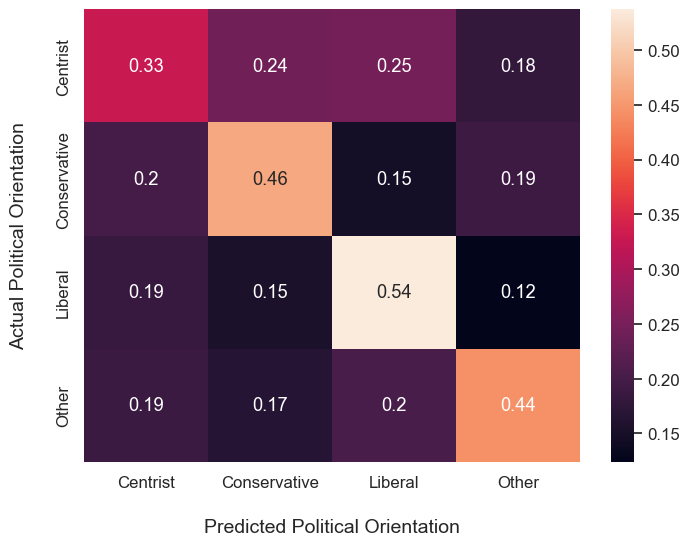

In [38]:
labels = ['Centrist', 'Conservative', 'Liberal', 'Other']
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(conf_matrix, annot=True )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Political Orientation", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(labels)

# set y-axis label and ticks
ax.set_ylabel("Actual Political Orientation", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(labels)

# set plot title
#ax.set_title("", fontsize=14, pad=20)

plt.show()